In [3]:
##简单实现梯度下降法求零点
def f(x):
    return x**3+2*x-3
def error(x):
    return (f(x)-0)**2
def gradient_descent(x):
    delta=0.0000000000001
    derivative=(error(x+delta)-error(x))/delta
    rate=0.01
    return x-rate*derivative
x = 0.8
for i in range(50):
    x = gradient_descent(x)
    print('x = {:6f}, f(x) = {:6f}'.format(x, f(x)))

x = 0.869644, f(x) = -0.603016
x = 0.921170, f(x) = -0.375999
x = 0.955365, f(x) = -0.217289
x = 0.975957, f(x) = -0.118494
x = 0.987471, f(x) = -0.062178
x = 0.993595, f(x) = -0.031902
x = 0.996760, f(x) = -0.016168
x = 0.998371, f(x) = -0.008136
x = 0.999183, f(x) = -0.004081
x = 0.999591, f(x) = -0.002043
x = 0.999795, f(x) = -0.001023
x = 0.999898, f(x) = -0.000512
x = 0.999949, f(x) = -0.000256
x = 0.999974, f(x) = -0.000128
x = 0.999987, f(x) = -0.000064
x = 0.999994, f(x) = -0.000032
x = 0.999997, f(x) = -0.000016
x = 0.999998, f(x) = -0.000008
x = 0.999999, f(x) = -0.000004
x = 1.000000, f(x) = -0.000002
x = 1.000000, f(x) = -0.000001
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.000000, f(x) = -0.000000
x = 1.00

In [32]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import sys
import random

In [33]:
def createLinearModel(dimension):
    """
    搭建模型，包括数据中的自变量，因变量和损失函数
    参数
    ----
    dimension : int，自变量的个数
    返回
    ----
    model ：dict，里面包含模型的参数，损失函数，自变量，因变量
    """
    np.random.seed(1024)
    #定义自变量和应变量
    x=tf.placeholder(tf.float64,shape=[None,dimension],name='x')
    y=tf.placeholder(tf.float64,shape=[None,1],name='y')
    #定义参数估计值和预测值
    betaPred=tf.Variable(np.random.random([dimension,1]))
    yPred=tf.matmul(x,betaPred,name='y_Pred')
    #定义损失函数
    loss=tf.reduce_mean(tf.square(yPred-y))
    model={'loss_function':loss,'independent_variable':x,'dependent_variable':y,'prediction':yPred,'model_params'
          :betaPred}
    return model

In [34]:
def generateLinearData(dimension,num):
    """
    随机产生线性模型数据
    参数
    ----
    dimension ：int，自变量个数
    num ：int，数据个数
    返回
    ----
    x ：np.array，自变量
    y ：np.array，因变量
    """
    np.random.seed(1024)
    beta=np.array(range(dimension))+1
    x=np.random.random((num,dimension))
    epsilon=np.random.random((num,1))
    y=x.dot(beta).reshape((-1,1))+epsilon
    return x,y

In [131]:
generateLinearData(5,100)

(array([[0.64769123, 0.99691358, 0.51880326, 0.65811273, 0.59906347],
        [0.75306733, 0.13624713, 0.00411712, 0.14950888, 0.698439  ],
        [0.59335256, 0.89991535, 0.44445739, 0.316785  , 0.92308176],
        [0.46586186, 0.79836458, 0.19915871, 0.81451901, 0.14347456],
        [0.68348512, 0.05661583, 0.78367529, 0.73656692, 0.77044435],
        [0.18667571, 0.04997537, 0.88998114, 0.17367291, 0.77317936],
        [0.28343952, 0.65596683, 0.98916562, 0.27378929, 0.41827639],
        [0.77468136, 0.25745294, 0.0542397 , 0.86471441, 0.25695302],
        [0.40226847, 0.30813142, 0.97151223, 0.57636455, 0.26928007],
        [0.87206155, 0.07803559, 0.76783911, 0.64167355, 0.19411802],
        [0.74487513, 0.95631884, 0.75249319, 0.67002594, 0.59444721],
        [0.18984809, 0.42716437, 0.81242037, 0.75882542, 0.71038717],
        [0.10320329, 0.8351814 , 0.49804452, 0.54264234, 0.49569754],
        [0.46510969, 0.09420092, 0.87298104, 0.16971045, 0.35137712],
        [0.19155728,

In [35]:
def gradientDescent(X,Y,model,learningRate=0.01,maxIter=10000,tol=1.e-6):
    """
    利用梯度下降法训练模型。
    参数
    ----
    X : np.array, 自变量数据
    Y : np.array, 因变量数据
    model : dict, 里面包含模型的参数，损失函数，自变量，应变量。
    """
    #确定最优化算法
    method=tf.train.GradientDescentOptimizer(learning_rate=learningRate)
    optimizer=method.minimize(model['loss_function'])
    #tensorflow开始运行
    sess=tf.Session()
    #产生初始参数
    init=tf.global_variables_initializer()
    #初始化模型
    sess.run(init)
    #迭代梯度下降法
    step=0
    prevLoss=np.inf
    diff=np.inf
    #当损失函数的变动小于阈值或达到最大循环次数，则停止迭代
    while (step<maxIter) & (diff>tol):
        _,loss=sess.run([optimizer,model['loss_function']],feed_dict={model['independent_variable']:X,model['dependent_variable']:Y})
        #计算损失函数的变动
        diff=abs(prevLoss-loss)
        prevLoss=loss
        step += 1
    #输出最终结果
    print("模型参数：\n%s" % sess.run(model["model_params"]))
    print("迭代次数：%s" % step)
    print("损失函数值：%s" % loss)



In [36]:
##批梯度下降法实例，X为30个变量，10000条观测，Y为10000条观测
dimension=30
num=10000
X,Y=generateLinearData(dimension,num)
model=createLinearModel(dimension)
gradientDescent(X,Y,model)

模型参数：
[[ 1.06077248]
 [ 2.05863727]
 [ 3.03868789]
 [ 4.04809199]
 [ 5.0495943 ]
 [ 6.04963631]
 [ 7.03697121]
 [ 8.03229628]
 [ 9.05768879]
 [10.04619607]
 [11.04209346]
 [12.05369665]
 [13.03365694]
 [14.03118297]
 [15.04319567]
 [16.04002888]
 [17.01602895]
 [18.00212025]
 [19.04206222]
 [20.0163811 ]
 [21.02755427]
 [21.99625668]
 [23.02793266]
 [24.04163186]
 [25.02147072]
 [26.03659721]
 [27.01218885]
 [28.00811668]
 [29.00657174]
 [30.0142857 ]]
迭代次数：4058
损失函数值：0.08488928116670245


In [136]:
def stochasticGradientDescent(X,Y,model,learningRate=0.01,miniBatchiFraction=0.01,epoch=10000,tol=1.e-6):
    """
    利用随机梯度下降法训练模型。
    参数
    ----
    X : np.array, 自变量数据
    Y : np.array, 因变量数据
    model : dict, 里面包含模型的参数，损失函数，自变量，应变量
    """
    #确定最优化算法
    method=tf.train.GradientDescentOptimizer(learning_rate=learningRate)
    optimizer=method.minimize(model['loss_function'])
    #tensorflow开始运行
    sess=tf.Session()
    #产生初始参数
    init=tf.global_variables_initializer()
    #初始化模型
    sess.run(init)
    #迭代梯度下降法
    step=0
    batchSize=int(X.shape[0]*miniBatchiFraction)
    batchiNum=int(math.ceil(1/miniBatchiFraction))
    prevLoss=np.inf
    diff=np.inf
    #当损失函数的变动小于阈值或达到最大训练轮次，则停止迭代
    while (step<epoch)&(diff>tol):
        for i in range(batchiNum):
            #选取小批次训练数据
            batchX=X[i*batchSize:(i+1)*batchSize]
            batchY=Y[i*batchSize:(i+1)*batchSize]
            #迭代参数模型
            sess.run([optimizer],{model['independent_variable']:batchX,model['dependent_variable']:batchY})
            ##计算损失函数的变动
            _,loss=sess.run([optimizer,model['loss_function']],{model['independent_variable']:X,model['dependent_variable']:Y})
            diff=abs(prevLoss-loss)
            prevLoss=loss
            if diff <=tol:
                break
        step += 1
    #输出最终结果
    print("模型参数：\n%s" % sess.run(model["model_params"]))
    print("训练轮次：%s" % step)
    print("损失函数值：%s" % loss)

        

In [137]:
##随机梯度下降法实例，X为30个变量，10000条观测，Y为10000条观测
dimension=30
num=10000
X,Y=generateLinearData(dimension,num)
model=createLinearModel(dimension)
stochasticGradientDescent(X,Y,model)

模型参数：
[[ 1.19353457]
 [ 2.16439143]
 [ 3.10523333]
 [ 4.13583887]
 [ 5.12710522]
 [ 6.10402002]
 [ 7.09997644]
 [ 8.08730221]
 [ 9.12311269]
 [10.10176293]
 [11.07340731]
 [12.09710187]
 [13.05726689]
 [14.01076485]
 [15.03883091]
 [16.04581475]
 [16.99985588]
 [17.96015608]
 [19.02757766]
 [20.00188039]
 [20.98076544]
 [21.92088054]
 [22.97592247]
 [24.00552283]
 [24.95032863]
 [25.95439719]
 [26.90722895]
 [27.89895866]
 [28.90606227]
 [29.91730251]]
训练轮次：15
损失函数值：0.09994303768779254


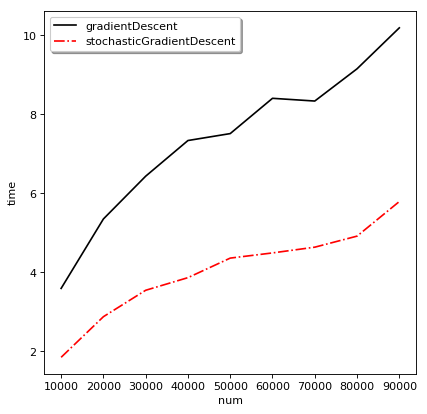

In [114]:
def compareWithDiffSize():
    """
    在不同数据量下，使用两种算法对同一模型做估计
    """
    re=[]
    dimension=20
    model=createLinearModel(dimension)
    for i in range(1,10):
        num=10000*i
        X,Y=generateLinearData(dimension,num)
        #使用梯度下降法估计模型
        startTime=timeit.default_timer()
        gradientDescent(X,Y,model)
        endTime=timeit.default_timer()
        gdTime=endTime-startTime
        #使用随机梯度下降法估计模型
        startTime=timeit.default_timer()
        stochasticGradientDescent(X,Y,model)
        endTime=timeit.default_timer()
        sgdTime=endTime-startTime
        re.append((num,gdTime,sgdTime))
    return re
def visualize(data):
    """
    绘制两种算法的运行时间比较图
    """
    #创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    #在图形框里只画一幅图
    ax = fig.add_subplot(111)
    dataSize = [i[0] for i in data]
    gdTime = [i[1] for i in data]
    sgdTime = [i[2] for i in data]
    ax.set_xlabel("num")
    ax.set_ylabel("time")
    ax.plot(dataSize, gdTime, "k", label="%s" % "gradientDescent")
    ax.plot(dataSize, sgdTime, "r-.", label="%s" % "stochasticGradientDescent")
    legend = plt.legend(shadow=True)
    plt.show()
if __name__ == "__main__":
    visualize(compareWithDiffSize())

In [30]:
import tensorflow as tf
## MNIST是一个手写数字数据库，它有60000个训练样本集和10000个测试样本集。
##它是NIST数据库的一个子集。其中每张图片固定大小为28×28×1(黑白图片，最后一个1指一个通道),每个像素点在0-255之间
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
##利用keras建立神经网络结构
model=tf.keras.models.Sequential([
    ##将数据‘铺平’即变为一维变量
    tf.keras.layers.Flatten(),
    ##定义隐藏层中512个神经元，激活函数为relu
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    ##保留率为1-0.2=0.8
    tf.keras.layers.Dropout(0.2),
    ##定义输出层为10个神经元，激活函数为softmax
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
##优化算法为adam，损失函数为稀疏的多类对数损失，评价准则为准确率
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
##模型训练，训练轮次为5次
model.fit(x_train, y_train, epochs=5)
##模型评估
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.1990 - acc: 0.9413
Epoch 2/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.0800 - acc: 0.9755
Epoch 3/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.0517 - acc: 0.9841
Epoch 4/5
60000/60000 [==============================] - 15s 244us/step - loss: 0.0365 - acc: 0.9882
Epoch 5/5
10000/10000 [==============================] - 1s 73us/step


[0.08149311560647911, 0.9772]

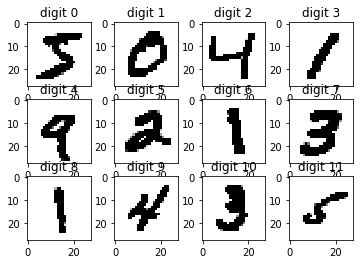

In [23]:
plt.figure(1)
for i in range(12):
    imageplot=plt.subplot(3,4,i+1)
    plt.imshow(x_train[i],cmap='binary',vmax=16,vmin=0)
    imageplot.set_title('digit %d'%i)